## Utils

In [23]:
from typing import List, Dict, Tuple, Callable
import os
import gc
import traceback
import warnings
from pdb import set_trace

import sklearn
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Importing the Data

In [15]:
columns = [
    "age", "workclass", "fnlwgt", "education", "education-num",
    "marital-status", "occupation", "relationship", "race", "sex",
    "capital-gain", "capital-loss", "hours-per-week", "native-country", "income"
]

file_path = os.path.join("adult", "adult.data")

df = pd.read_csv(
    file_path,
    names=columns,
    sep=',',
    na_values='?',
    skipinitialspace=True
)


## Visualizing the Data

/var/folders/86/vnwv0vm95437pgydx0sm7wb80000gn/T/ipykernel_30716/1496946020.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='income', data=df, palette='viridis')


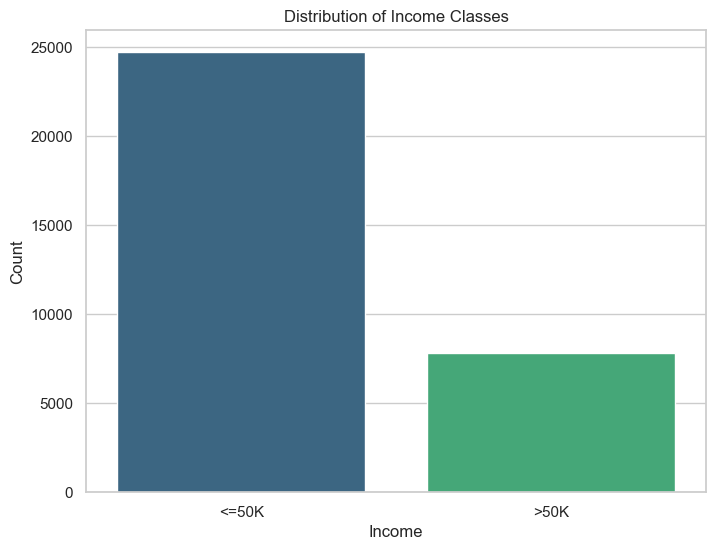

In [16]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.countplot(x='income', data=df, palette='viridis')
plt.title('Distribution of Income Classes')
plt.xlabel('Income')
plt.ylabel('Count')
plt.show()

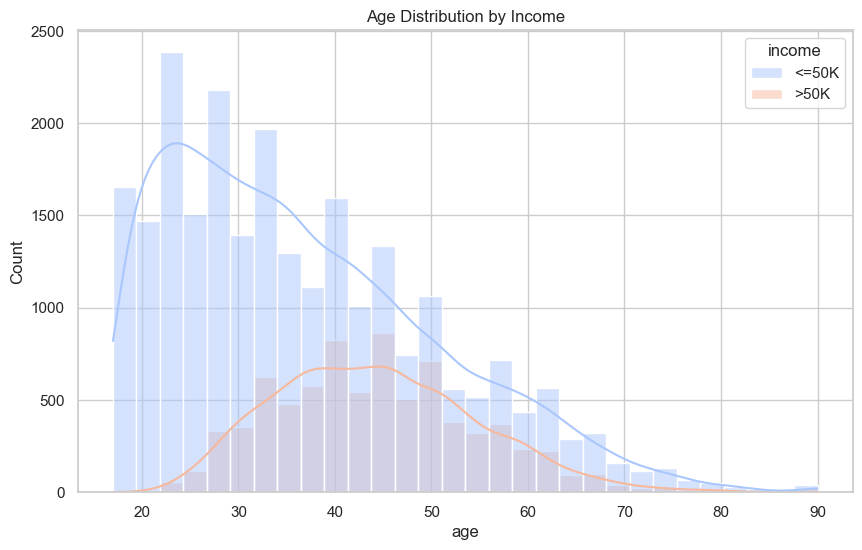

In [17]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='age', hue='income', bins=30, kde=True, palette='coolwarm')
plt.title('Age Distribution by Income')
plt.show()

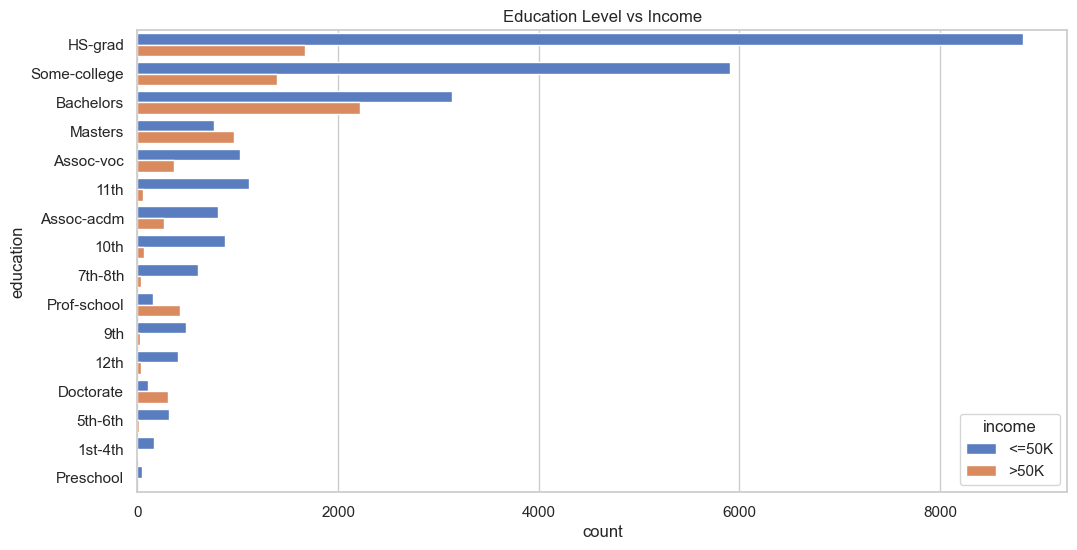

In [18]:
plt.figure(figsize=(12, 6))
sns.countplot(y='education', data=df, order=df['education'].value_counts().index, hue='income', palette='muted')
plt.title('Education Level vs Income')
plt.show()

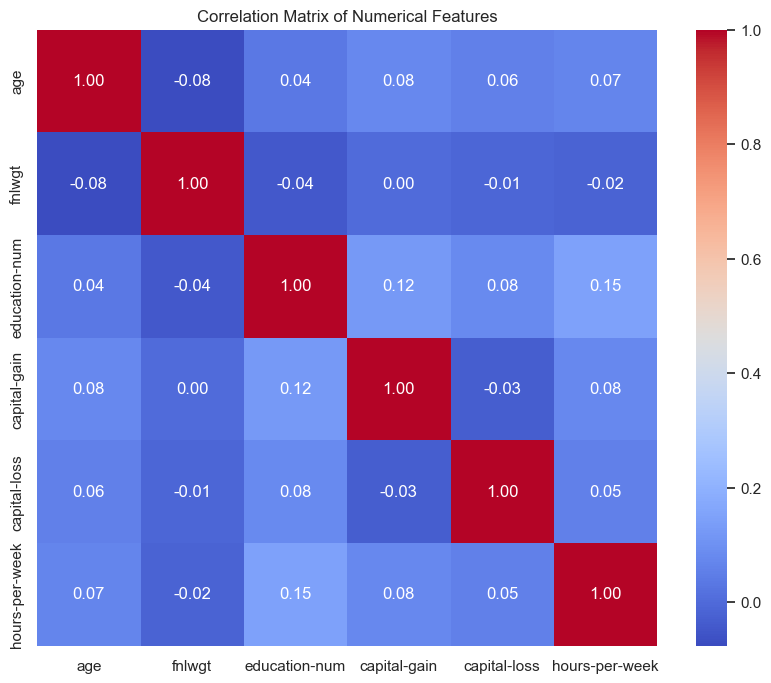

In [19]:
numeric_df = df.select_dtypes(include=['number'])

plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

## Data Prossecing

In [20]:
X = df.drop('income', axis=1) #Features without the income colum
y=df['income'] #Target

print("Features shape:", X.shape)
print("Target shape:", y.shape)

Features shape: (32561, 14)
Target shape: (32561,)


In [21]:
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(
    X, 
    y, 
    test_size=0.2, 
    random_state=42, 
    stratify=y
)

print(f"Training samples: {len(X_train)}")
print(f"Testing samples: {len(X_test)}")

Training samples: 26048
Testing samples: 6513


## Confusion Matrix

In [24]:
def evaluate_model(model, X_test, y_test, title="Confusion Matrix"):
    """
    Generates predictions, calculates accuracy, and plots the confusion matrix.
    
    Parameters:
    - model: The trained sklearn model
    - X_test: The test features
    - y_test: The true test labels
    - title: (Optional) Title for the plot
    """
    
    # 1. Generate Predictions
    predictions = model.predict(X_test)
    
    # 2. Print Accuracy Score
    acc = accuracy_score(y_test, predictions)
    print(f"Model Accuracy: {acc:.2%}")
    
    # 3. Create and Plot Confusion Matrix
    cm = confusion_matrix(y_test, predictions)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    
    plt.figure(figsize=(8, 6))
    disp.plot(cmap='Blues', values_format='d')
    plt.title(f"{title}\n(Accuracy: {acc:.2%})")
    plt.grid(False) 
    plt.show()